### Building and Evaluating Artificial Neural Networks: A Comparative Study with the Iris and MNIST Datasets

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

In [30]:
# Load the Iris dataset
iris = pd.read_csv('iris.csv')  # Ensure the CSV file is in your working directory

# Display the first few rows of the dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


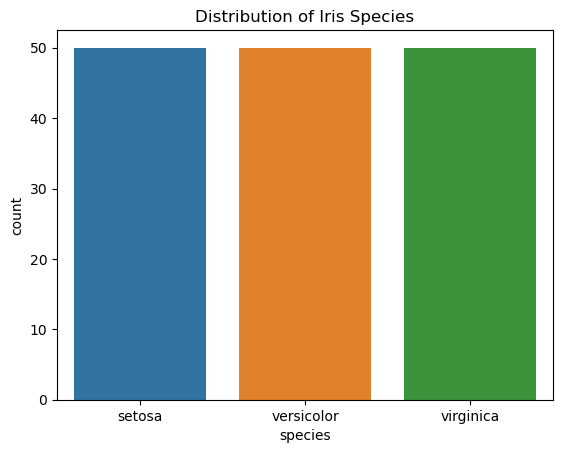

In [31]:
# Explore the dataset
# Display dataset information
iris.info()

# Check for missing values
print("Missing values in each column:")
print(iris.isnull().sum())

# Visualize the distribution of classes
sns.countplot(x='species', data=iris)
plt.title('Distribution of Iris Species')
plt.show()

In [32]:
# Convert labels to numerical values
encoder = LabelEncoder()
y = encoder.fit_transform(iris.iloc[:, -1].values)  # Encode species labels

# Features
X = iris.iloc[:, :-1].values  # All columns except the last one

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Build the ANN model
model = Sequential()
model.add(Dense(units=8, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='softmax'))  # 3 classes for iris species

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2194 - loss: 1.3874 - val_accuracy: 0.2917 - val_loss: 1.3563
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2815 - loss: 1.1848 - val_accuracy: 0.2500 - val_loss: 1.2613
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3425 - loss: 1.0859 - val_accuracy: 0.2500 - val_loss: 1.1862
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3752 - loss: 0.9973 - val_accuracy: 0.3750 - val_loss: 1.1160
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4013 - loss: 0.9660 - val_accuracy: 0.4167 - val_loss: 1.0615
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4185 - loss: 0.9267 - val_accuracy: 0.4583 - val_loss: 1.0185
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5250 - loss: 0.9159 - val_accuracy: 0.5417 - val_loss: 0.9852
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6047 - loss: 0.8483 - val_accuracy: 0.5833 -

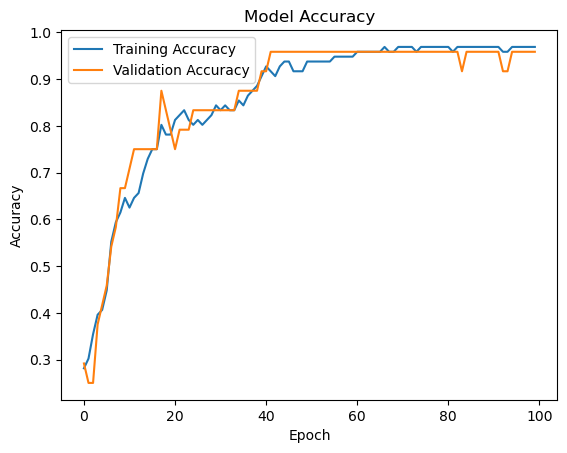

In [35]:
#Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.2)

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [36]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9333 - loss: 0.0931
Test Accuracy: 0.93


In [37]:
# Load the MNIST dataset
import tensorflow as tf
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Display dataset information
print(ds_info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\Administrator\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
 

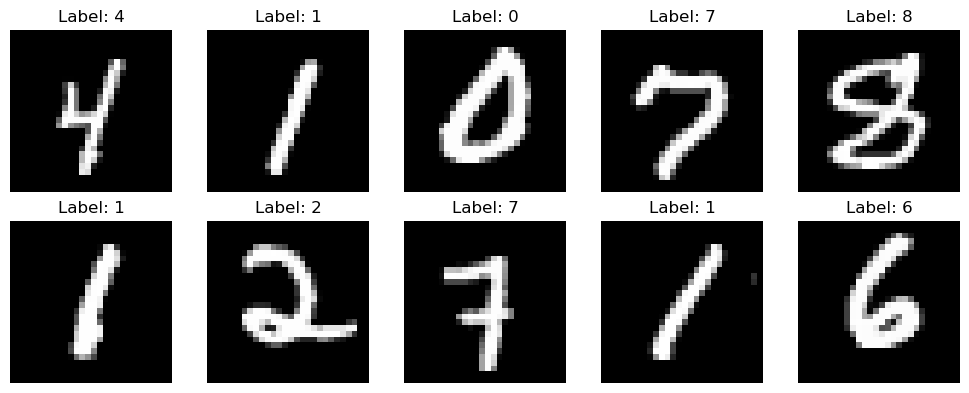

In [38]:
# Visualize some MNIST samples
def visualize_mnist_samples(ds, num_samples=10):
    plt.figure(figsize=(10, 4))
    for i, (image, label) in enumerate(ds.take(num_samples)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(image.numpy().squeeze(), cmap='gray')
        plt.title(f'Label: {label.numpy()}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize samples from the training dataset
visualize_mnist_samples(ds_train)

In [39]:
# Normalize images to [0, 1] range
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

# Prepare training and testing datasets
ds_train = ds_train.map(normalize_img).cache().shuffle(1000).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).batch(128).prefetch(tf.data.AUTOTUNE)

In [40]:
# Build the model for MNIST
model_mnist = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten input images
    tf.keras.layers.Dense(128, activation='relu'),   # Hidden layer with ReLU activation
    tf.keras.layers.Dense(10)                         # Output layer for 10 classes (digits)
])

# Compile the model
model_mnist.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8364 - loss: 0.5984 - val_accuracy: 0.9456 - val_loss: 0.1905
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9501 - loss: 0.1744 - val_accuracy: 0.9598 - val_loss: 0.1320
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9647 - loss: 0.1210 - val_accuracy: 0.9662 - val_loss: 0.1114
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9731 - loss: 0.0922 - val_accuracy: 0.9691 - val_loss: 0.1004
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9789 - loss: 0.0741 - val_accuracy: 0.9712 - val_loss: 0.0940
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9817 - loss: 0.0618 - val_accuracy: 0.9746 - val_loss: 0.0828


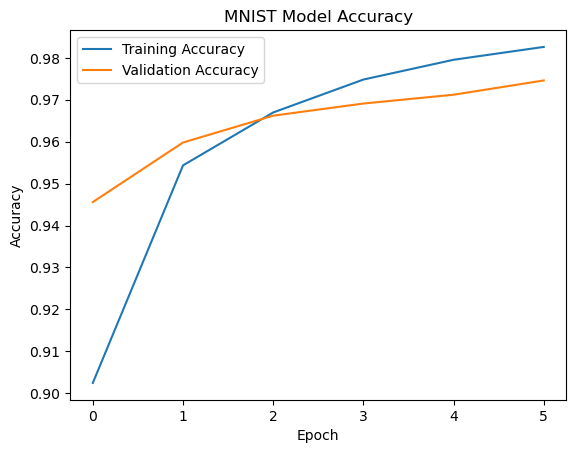

In [41]:
# Train the MNIST model
history_mnist = model_mnist.fit(ds_train, epochs=6, validation_data=ds_test)

# Visualize training history for MNIST
plt.plot(history_mnist.history['accuracy'], label='Training Accuracy')
plt.plot(history_mnist.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [42]:
# Evaluate the MNIST model
test_loss, test_accuracy = model_mnist.evaluate(ds_test)
print(f'Test accuracy: {test_accuracy:.3f}')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9745 - loss: 0.0824
Test accuracy: 0.975
